<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from evsim.data import loader

__EPEX Intraday continous market__

- Continuous trading 7 days a week, 24 hours a day, all year around  
- Hourly contracts for the next day open at 15:00 pm (d-1) for DE, FR, CH & AT 
- Hourly contracts for the next day open at 2.00 pm (d-1) for NL & BE 
- 30-min contracts for the next day open at 15:30 (d-1) for CH, DE, FR 


- **15-min contracts for the next day open at 4.00 pm (d-1)**
- **LEAD TIME: 5 Minutes, Clearing every 15 Min**
- Till when do we trade when we assume average clearing prices?

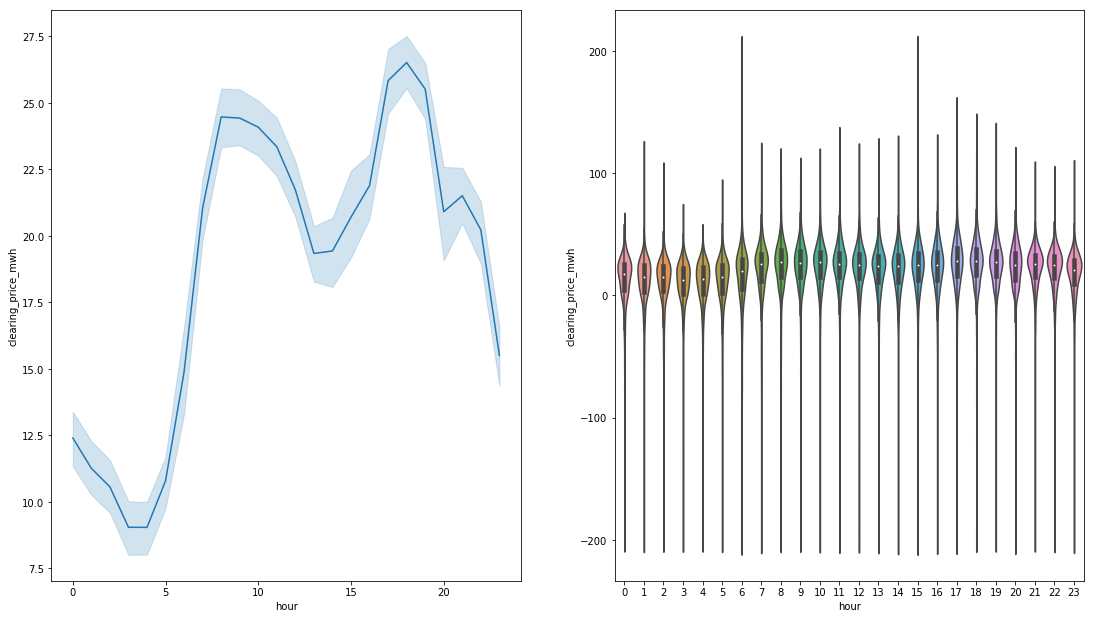

In [3]:
df = loader.load_intraday_prices()
df["hour"] = df["product_time"].dt.hour

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 10.5)

sns.lineplot(x="hour", y="clearing_price_mwh", data=df, ax=ax1)

df["clearing_price_mwh"] = df["clearing_price_mwh"].clip(-200,200)
sns.violinplot(x="hour", y="clearing_price_mwh", data=df, ax=ax2);